# Proyecto No. 2

#### Sebastián Solorzano - 21826

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

### Análisis de datos exploratorio (EDA)

In [6]:
df = pd.read_csv('message.csv', usecols=[0, 1], skiprows=1, names=['type', 'message'], encoding='latin-1')

In [7]:
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape

(5572, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df['type'].value_counts()

type
ham     4825
spam     747
Name: count, dtype: int64

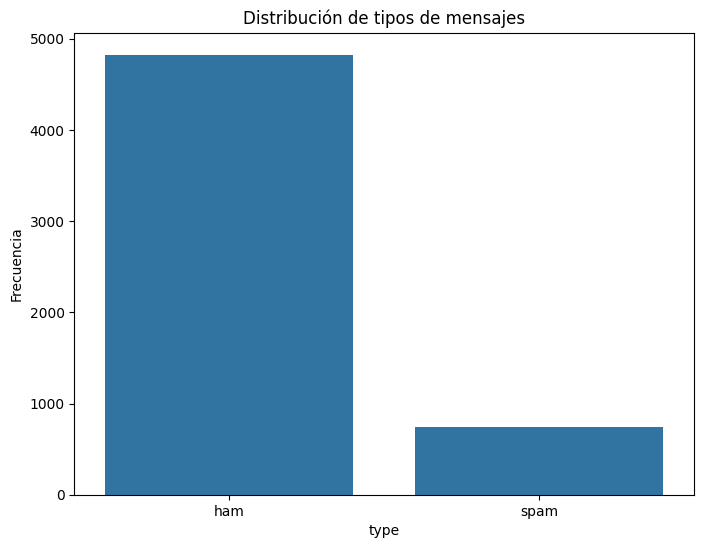

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type')
plt.title('Distribución de tipos de mensajes')
plt.xlabel('type')
plt.ylabel('Frecuencia')
plt.show()

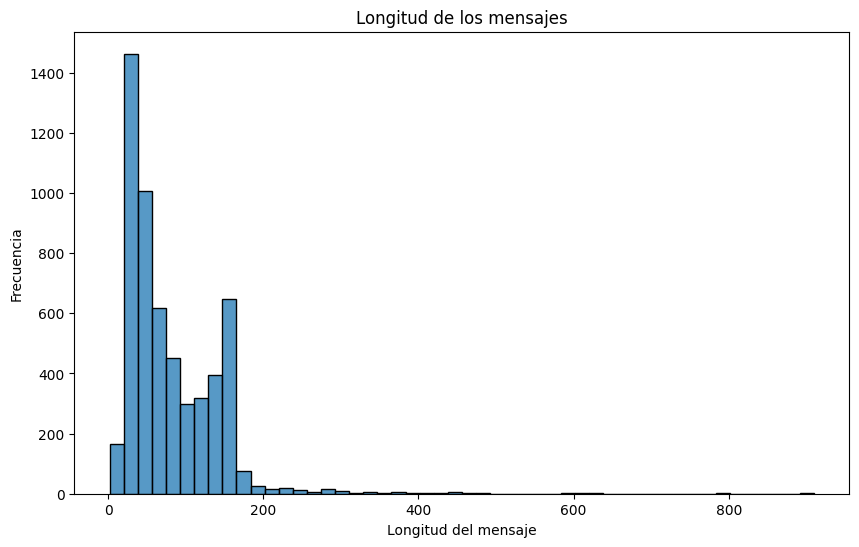

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df['message'].apply(len), bins=50)
plt.title('Longitud de los mensajes')
plt.xlabel('Longitud del mensaje')
plt.ylabel('Frecuencia')
plt.show()

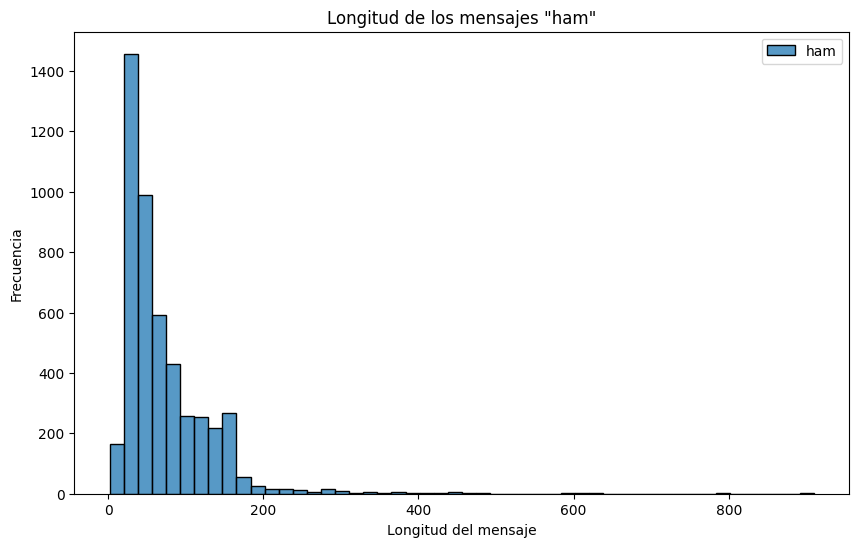

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['type'] == 'ham'], x=df[df['type'] == 'ham']['message'].apply(len), bins=50, label='ham')
plt.title('Longitud de los mensajes "ham"')
plt.xlabel('Longitud del mensaje')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

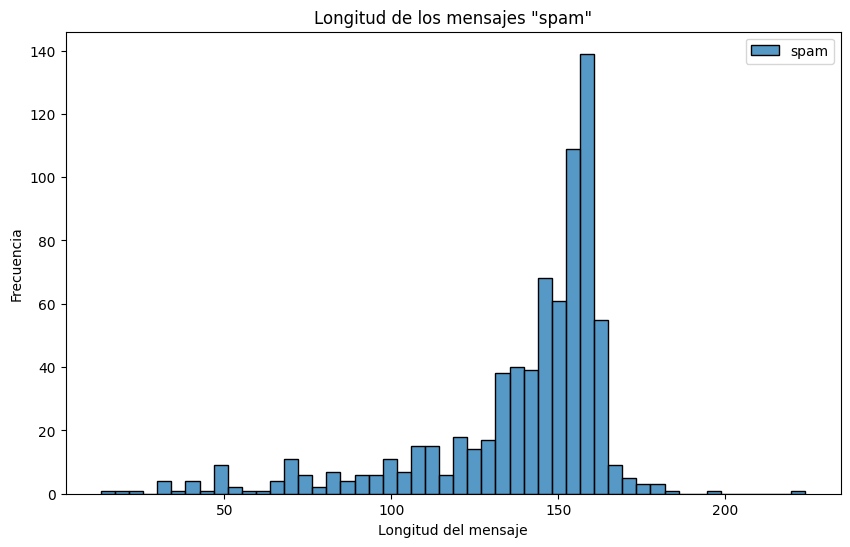

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['type'] == 'spam'], x=df[df['type'] == 'spam']['message'].apply(len), bins=50, label='spam')
plt.title('Longitud de los mensajes "spam"')
plt.xlabel('Longitud del mensaje')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

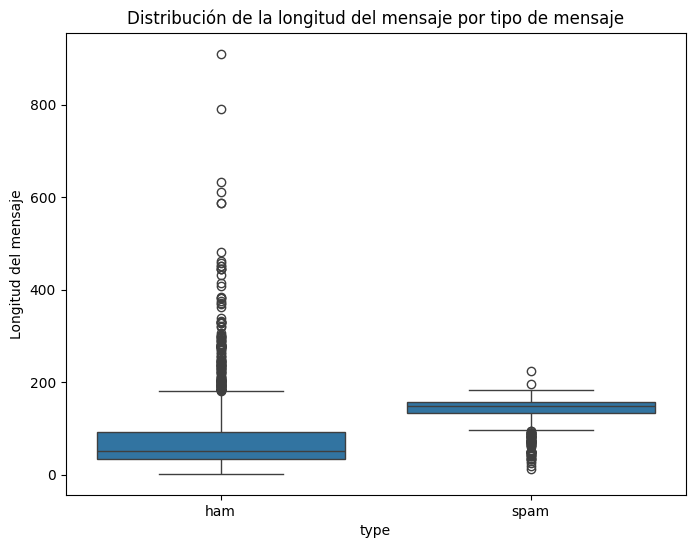

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='type', y=df['message'].apply(len))
plt.title('Distribución de la longitud del mensaje por tipo de mensaje')
plt.xlabel('type')
plt.ylabel('Longitud del mensaje')
plt.show()

### Limpieza de datos

In [16]:
datos = pd.read_csv('spam-proyecto.csv', usecols=[0, 1], skiprows=1, names=['type', 'message'], encoding='latin-1')

In [17]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

{'wasn', 'shan', 'below', 'some', 'does', 'by', 'up', 'it', 'they', 'with', 'my', 'no', 'doesn', 'nor', 'a', 'won', 'herself', 'above', 'when', 'to', 'weren', 'the', 'ma', 'your', 'why', 'this', 've', 'very', 'were', "mightn't", 'and', 'both', 'between', 'don', 'mustn', 'its', 'she', 'just', 'here', 'that', 'while', 'other', 'themselves', 'should', 'those', 'because', "doesn't", 'more', 'from', 'be', 'off', 'all', "you'd", 'me', "you'll", 'we', "you're", 'ours', 'yourselves', 'own', 'such', 'hadn', 'our', "shouldn't", 'ain', 'doing', 'out', "won't", "should've", 'same', 'did', 'which', 'at', "shan't", 'during', "she's", 'not', "couldn't", "wouldn't", 'only', 'against', "isn't", 'about', "hadn't", 'him', "hasn't", 'before', "that'll", 'whom', 'these', 'didn', 'as', 'his', 'm', 'but', 'than', 't', 'd', 'had', 'after', 'few', 'in', 'further', "weren't", "you've", 'o', 'he', "didn't", 'will', 'mightn', 'is', 'what', 'hasn', 's', 'too', 'himself', 'do', 'ourselves', "aren't", "mustn't", 'mo

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\50242\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\50242\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
stemmer = PorterStemmer()

In [20]:
def preprocess_message(message):
    # Convertir a minúsculas
    message = message.lower()

    # Dividir el mensaje en palabras
    words = message.split()

    # Eliminar signos de puntuación y palabras comunes
    words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in words if word not in stop_words]

    # Lematizar las palabras
    words = [lemmatizer.lemmatize(word) for word in words]

    # Aplicar stemming a las palabras
    words = [stemmer.stem(word) for word in words]

    # Eliminar palabras entre comillas
    words = [word for word in words if not re.match(r'^\W+$', word)]

    # Unir las palabras en un solo mensaje
    processed_message = ' '.join(words)

    return processed_message

In [21]:
def preprocess_column(column):
    preprocessed_column = column.apply(preprocess_message)
    column[:] = preprocessed_column.values
    return column

In [22]:
preprocess_column(datos['message'])

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                     nah think go usf life around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                                b go esplanad fr home
5569                        piti  mood that soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [23]:
datos.head()

,type,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think go usf life around though


### Modelo

In [24]:
def calculate_probabilities(datos, word):
    # Calcular P(S)
    p_spam = datos[datos['type'] == 'spam'].shape[0] / datos.shape[0]

    # Calcular P(H)
    p_ham = 1 - p_spam

    # Calcular P(W|S)
    spam_messages = datos[datos['type'] == 'spam']['message']
    spam_word_count = sum(spam_messages.str.split().apply(lambda x: word in x))
    total_spam_messages = spam_messages.shape[0]
    p_w_given_spam = spam_word_count / total_spam_messages

    # Calcular P(W|H): 
    ham_messages = datos[datos['type'] == 'ham']['message']
    ham_word_count = sum(ham_messages.str.split().apply(lambda x: word in x))
    total_ham_messages = ham_messages.shape[0]
    p_w_given_ham = ham_word_count / total_ham_messages

    return p_spam, p_ham, p_w_given_spam, p_w_given_ham

In [25]:
def calculate_probability_word(word, p_spam, p_ham, p_w_given_spam, p_w_given_ham):
    # Calcular P(S|W)
    p_spam_given_word = (p_w_given_spam * p_spam) / ((p_w_given_spam * p_spam) + (p_w_given_ham * p_ham))

    # Calcular P(H|W)
    p_ham_given_word = 1 - p_spam_given_word

    return p_spam_given_word, p_ham_given_word

In [26]:
word = 'free'
p_spam, p_ham, p_w_given_spam, p_w_given_ham = calculate_probabilities(datos, word)
p_spam_given_word, p_ham_given_word = calculate_probability_word(word, p_spam, p_ham, p_w_given_spam, p_w_given_ham)
print(f'Probabilidad de que un texto sea SPAM dado que contiene la palabra "{word}": {p_spam_given_word}')
print(f'Probabilidad de que un texto sea HAM dado que contiene la palabra "{word}": {p_ham_given_word}')

Probabilidad de que un texto sea SPAM dado que contiene la palabra "free": 0.7410714285714286
Probabilidad de que un texto sea HAM dado que contiene la palabra "free": 0.2589285714285714


In [43]:
def calculate_probability_words(word_list, datos):
    # Obtener la cantidad SPAM y HAM
    total_spam_messages = datos[datos['type'] == 'spam'].shape[0]
    total_ham_messages = datos[datos['type'] == 'ham'].shape[0]

    p_words_spam = []
    p_words_ham = []

    for word in word_list:
        # Contar la cantidad SPAM y HAM que contienen la palabra
        spam_word_count = datos[datos['type'] == 'spam']['message'].str.contains(word).sum()
        ham_word_count = datos[datos['type'] == 'ham']['message'].str.contains(word).sum()

        # Calcular P(W|S) y P(W|H)
        p_word_spam = spam_word_count / total_spam_messages
        p_word_ham = ham_word_count / total_ham_messages

        p_words_spam.append(p_word_spam)
        p_words_ham.append(p_word_ham)

    # Calcular P(S|W) y P(H|W)
    p_spam_given_words = 1
    p_ham_given_words = 1
    for p_word_spam, p_word_ham in zip(p_words_spam, p_words_ham):
        p_spam_given_words *= p_word_spam
        p_ham_given_words *= p_word_ham

    # Normalizar utilizando el teorema de Bayes
    p_spam_given_words /= (p_spam_given_words + p_ham_given_words)
    p_ham_given_words = 1 - p_spam_given_words

    return p_spam_given_words, p_ham_given_words

In [44]:
word_list = ['free', 'win', 'offer']
#word_list = ['thank', 'good', 'great']
p_spam_given_words, p_ham_given_words = calculate_probability_words(word_list, datos)
print(f'Probabilidad de que un texto sea SPAM dado que contiene las palabras {word_list}: {p_spam_given_words}')
print(f'Probabilidad de que un texto sea HAM dado que contiene las palabras {word_list}: {p_ham_given_words}')

Probabilidad de que un texto sea SPAM dado que contiene las palabras ['free', 'win', 'offer']: 0.9998578506039549
Probabilidad de que un texto sea HAM dado que contiene las palabras ['free', 'win', 'offer']: 0.00014214939604506593


### Pruebas de rendimiento

In [35]:
X_train, X_test, y_train, y_test = train_test_split(datos['message'], datos['type'], test_size=0.2, random_state=42)

In [36]:
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [37]:
y_pred = model.predict(X_test)

In [38]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[961   4]
 [ 17 133]]


In [39]:
# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

Reporte de clasificación:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

